# 결정트리

- (개정판)파이썬 라이브러리를 활용한 머신러닝, 한빛미디어, 2019.
    - 2.3.5 결정트리(decision tree)

## 공통

In [2]:
#%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [3]:
from preamble import *

## 결정 트리를 활용한 회귀

### DT-Q5 결정트리를 사용해서 `ram_price`을 분석하여, 가격을 예측하세요.
- [ ] DT-Q5(a). pandas를 사용해서 "ram_price.csv" 파일을 `ram_prices` 객체를 생성하세요.

In [5]:
ram_prices = pd.read_csv("data/ram_price.csv")

- [ ] DT-Q5(b). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - y축의 지수에 `-`값을 표현할 수 없기 때문에 y축의 폰트를 `consolas`로 변경하세요.
    - x축과 y축에 label을 표시하세요("년" / "가격 ($/Mbyte)")
    - 일반적인 선 그래프를 사용하세요.   

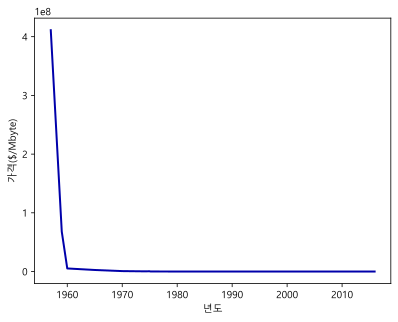

In [13]:
plt.plot(ram_prices.date, ram_prices.price)
plt.xlabel("년도")
plt.ylabel("가격($/Mbyte)")
plt.show()

- [ ] DT-Q5(c). `ram_prices` 변수를 `년도/가격` 그래프로 표현하세요.
    - 해당 그래프를 `log` 그래프로 변경하세요.

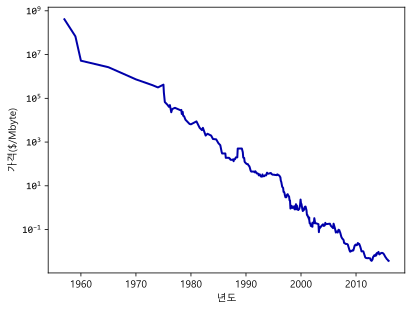

In [11]:
plt.yticks(fontname = "consolas")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년도")
plt.ylabel("가격($/Mbyte)")
plt.show()

- [ ] DT-Q5(d). 학습데이터와 테스트 데이터를 분리하세요.
    - 학습 데이터는 1999년까지 데이터를 사용하세요.
    - 테스트 데이터는 1999년 이후 데이터를 사용하세요.

In [27]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

pandas.core.series.Series

- [ ] DT-Q5(e). 학습데이터와 테스트 데이터를 분류하여 작성하세요.
    - y값은 log 함수를 적용하세요.

In [35]:
X_train = data_train.date.to_numpy()[:,np.newaxis]
y_train = np.log(data_train.price)

0      19.83
1      18.03
2      15.47
3      14.79
4      13.51
       ...  
197    -0.25
198    -0.14
199     0.04
200     0.29
201     0.85
Name: price, Length: 202, dtype: float64

- [ ] DT-Q5(f). 결정트리의 회귀와 선형 회귀 예측기를 생성하고, 데이터에 학습을 진행하세요.
    - tree
    - linear_reg

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

- DT-Q5(g). 두 예측기에 테스트를 진행하세요.
    - 테스트에 사용되는 데이터는 모든 데이터를 활용하세요.

In [40]:
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

print(pred_tree, pred_lr)

[19.834 18.034 15.472 14.787 13.506 12.898 12.659 12.952 12.102 11.121
 10.818 10.614 10.799 10.045 10.373 10.513 10.24  10.29   9.863 10.086
  9.68   9.629  9.262  8.81   8.776  9.083  8.407  8.166  8.404  7.591
  7.782  7.591  7.229  7.194  6.78   6.579  6.31   6.04   5.858  5.704
  5.704  5.704  5.704  5.704  5.704  5.704  5.247  5.247  5.247  5.247
  5.247  5.247  5.247  5.17   5.17   5.056  5.037  5.037  5.037  5.037
  5.037  5.094  4.89   5.094  5.094  5.094  5.204  5.293  5.293  5.293
  6.225  6.225  6.225  6.225  6.225  6.225  6.225  6.225  6.225  6.225
  5.841  5.283  5.236  5.236  4.852  4.762  4.727  4.663  4.588  4.588
  4.494  4.416  4.396  4.27   4.078  3.932  3.818  3.795  3.795  3.807
  3.807  3.807  3.78   3.78   3.721  3.835  3.807  3.684  3.684  3.592
  3.592  3.592  3.55   3.401  3.481  3.512  3.434  3.314  3.27   3.27
  3.27   3.5    3.314  3.314  3.314  3.314  3.401  3.401  3.401  3.401
  3.584  3.684  3.578  3.578  3.578  3.584  3.619  3.619  3.619  3.651
  3.611

- DT-Q5(h). 예측된 값을 기존값으로 변환하세요.

In [43]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

- DT-Q5(i). 기존 데이터와 예측 데이터 모두를 시각화하세요.

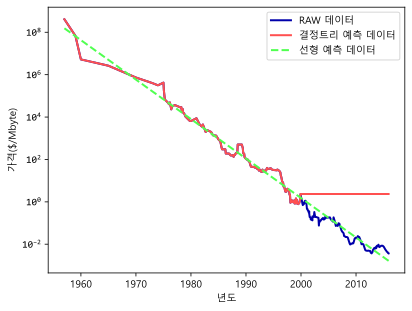

In [54]:
plt.yticks(fontname = "consolas")
#plt.semilogy(ram_prices.date, ram_prices.price, base=np.e)
plt.semilogy(ram_prices.date, ram_prices.price, label = "RAW 데이터")
plt.semilogy(ram_prices.date, price_tree, label = "결정트리 예측 데이터")
plt.semilogy(ram_prices.date, price_lr, label = "선형 예측 데이터")
plt.xlabel("년도")
plt.ylabel("가격($/Mbyte)")
plt.legend()
plt.show()